## Week 4 Exercise

In [1]:
import sys
# Python 3.7 is required
assert sys.version_info >= (3, 7)
import cv2 as cv
import cv2
import numpy as np

In [6]:
def show_img(window_name, img, adjust=False):
    """3 arguments: window name, source images, boolean to adjust to screen size"""
    if adjust:
        cv.namedWindow(window_name, cv.WINDOW_NORMAL)
    else:
        cv.namedWindow(window_name)

    cv.imshow(window_name, img)
    cv.waitKey(0)
    cv.destroyAllWindows()

Q1

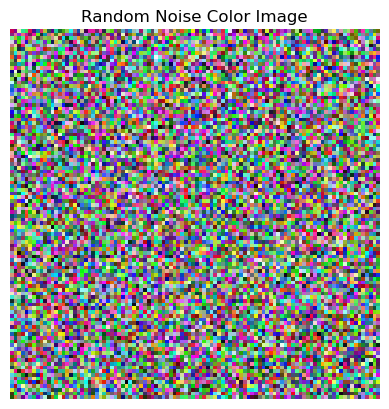

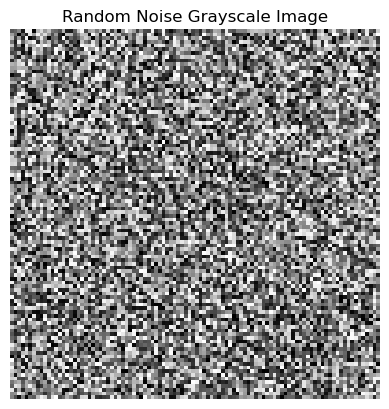

In [2]:
import matplotlib.pyplot as plt

color_image_pixels = np.random.randint(0, 256, size=(100, 100, 3), dtype=np.uint8)
grayscale_image_pixels = np.random.randint(0, 256, size=(100, 100), dtype=np.uint8)

# Display the color image
plt.imshow(color_image_pixels)
plt.title("Random Noise Color Image")
plt.axis('off')  # Hide the axis ticks and labels
plt.show()

# Display the grayscale image
plt.imshow(grayscale_image_pixels, cmap='gray')
plt.title("Random Noise Grayscale Image")
plt.axis('off')  # Hide the axis ticks and labels
plt.show()

Q2

In [8]:
def crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color):
    img_copy = img.copy()

    height, width = img.shape[:2]

    # Calculate the number of pixels per patch
    M, N = int(height / num_vertical_grid), int(width / num_horizontal_grid)

    for y in range(0, height, M):
        for x in range(0, width, N):
            y1 = y + M
            x1 = x + N
            if x1 >= width and y1 >= height:
                x1 = width - 1
                y1 = height - 1

            cv.rectangle(img_copy, (x, y), (x1, y1), line_color, 1)

    return img_copy

# Load the image
img = cv.imread("C:\\Users\\lezho\\Downloads\\dog.jfif")

# Crop the image and draw grid lines
img_with_grid = crop_grid(img, 3, 2, (0,0,255))

# Display the image with grids
show_img('Image with Grids', img_with_grid)

Q3

In [4]:
# Load the two input images
lena = cv.imread("C:\\Users\\lezho\\Downloads\\lena.jfif")
coin = cv.imread("C:\\Users\\lezho\\Downloads\\coins.jfif")

# Resize coin to be the same dimension as lena
h, w = lena.shape[:2]
coin = cv.resize(coin, (w, h))

# Define the alpha values for smooth transition
alpha_values = [x / 10.0 for x in range(11)]  # 0.0, 0.1, 0.2, ..., 1.0

# Display image sequences with smooth transition
for alpha in alpha_values:
    # Perform image blending using the addWeighted function
    res = cv.addWeighted(lena, alpha, coin, 1 - alpha, 0)

    # Display the blended image
    cv.imshow("Blended Image", res)

    # Wait for a short duration (in milliseconds) to show the transition smoothly
    cv.waitKey(200)

# Wait for a key press and then close all windows
cv.waitKey(0)
cv.destroyAllWindows()

Q4

In [7]:
watermark = cv.imread("C:\\Users\\lezho\\Downloads\\watermark.png")
img = cv.imread("C:\\Users\\lezho\\Downloads\\travel_hd.jpg")
overlay = np.zeros_like(img)
h,w = img.shape[:2]
hW, wW = watermark.shape[:2]
overlay[h-hW-15:h-15,15:15+wW] = watermark
watermarked_img = cv.addWeighted(img,1,overlay,0.4,0)
show_img("watermark",watermarked_img,adjust=True)